In [9]:
import pandas as pd
import json
import seaborn as sns
import matplotlib.pyplot as plt

In [15]:
with open('email_training_data.json') as file:
    training_data_json = json.load(file)
    df_train = pd.DataFrame(training_data_json)

with open('email_testing_data.json') as file:
    testing_data_json = json.load(file)
    df_test = pd.DataFrame(testing_data_json)

with open('emaildata.json') as file:
    data = json.load(file)
    df = pd.DataFrame(data)

In [3]:
# Check data type for each column
print(df.dtypes)

Sender Address    object
Sender Name       object
Subject           object
Content           object
Category          object
dtype: object


In [4]:
# Check for missing values
print(df.isnull().sum())

Sender Address    0
Sender Name       0
Subject           0
Content           0
Category          0
dtype: int64


In [22]:
df.describe()

,Sender Address,Sender Name,Subject,Content,Category
count,180,180,180,180,180
unique,160,159,175,179,3
top,Ninja Van SG,noreply@support.lazada.sg,Your parcel from Lazada is being delivered to ...,Your parcel from Lazada is being delivered to ...,Updates
freq,4,4,2,2,92


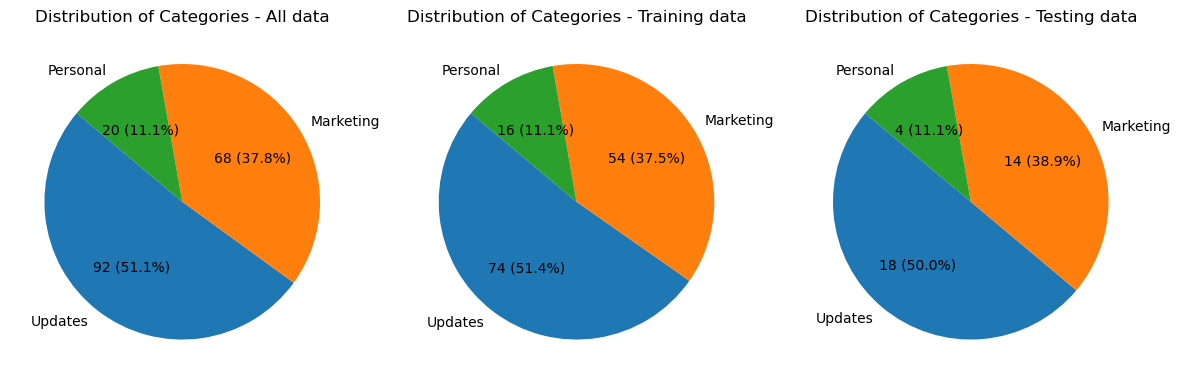

In [21]:
plt.figure(figsize=(12, 6))

# Subplot 1: Distribution of categories in all data
plt.subplot(1, 3, 1)
category_counts_df = df['Category'].value_counts()
category_counts_df.plot(kind='pie', startangle=140, autopct=lambda p: '{:.0f} ({:.1f}%)'.format(p * sum(category_counts_df) / 100, p))
plt.title('Distribution of Categories - All data')
plt.ylabel('')

# Subplot 2: Distribution of categories in training data
plt.subplot(1, 3, 2)
category_counts_df_train = df_train['Category'].value_counts()
category_counts_df_train.plot(kind='pie', startangle=140, autopct=lambda p: '{:.0f} ({:.1f}%)'.format(p * sum(category_counts_df_train) / 100, p))
plt.title('Distribution of Categories - Training data')
plt.ylabel('')

# Subplot 3: Distribution of categories in testing data
plt.subplot(1, 3, 3)
category_counts_df_test = df_test['Category'].value_counts()
category_counts_df_test.plot(kind='pie', startangle=140, autopct=lambda p: '{:.0f} ({:.1f}%)'.format(p * sum(category_counts_df_test) / 100, p))
plt.title('Distribution of Categories - Testing data')
plt.ylabel('')

plt.tight_layout()
plt.show()

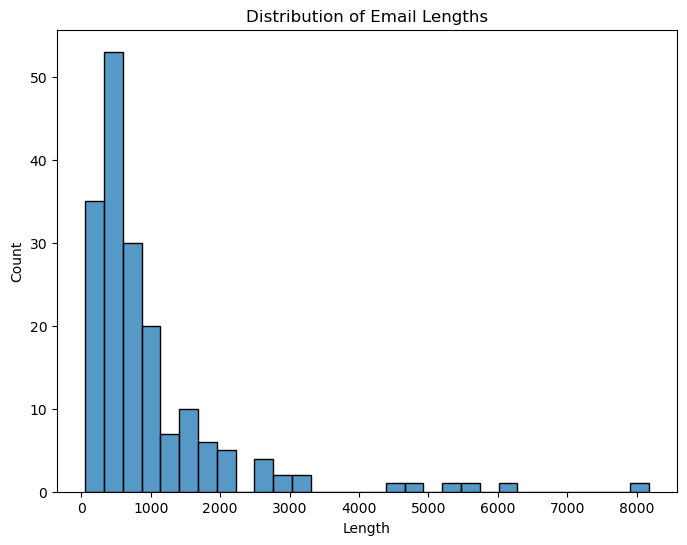

In [11]:
# Distribution of email lengths
df['Email Length'] = df['Content'].apply(len)
plt.figure(figsize=(8, 6))
sns.histplot(df['Email Length'], bins=30)
plt.title('Distribution of Email Lengths')
plt.xlabel('Length')
plt.ylabel('Count')
plt.show()

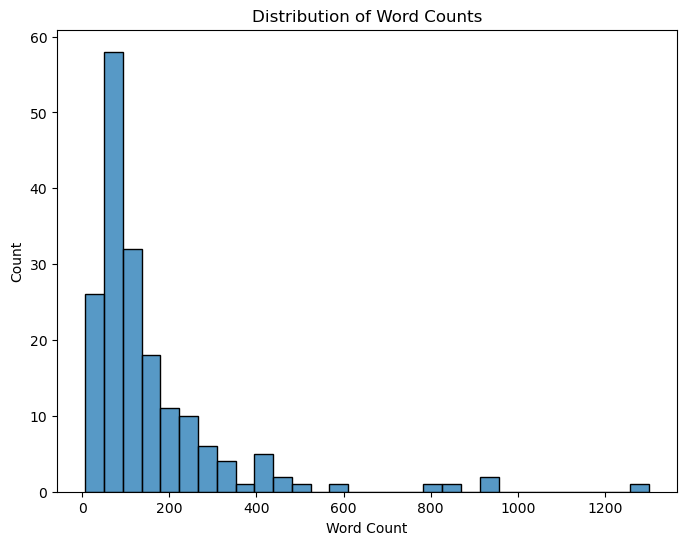

In [12]:
# Word count distribution
df['Word Count'] = df['Content'].apply(lambda x: len(x.split()))
plt.figure(figsize=(8, 6))
sns.histplot(df['Word Count'], bins=30)
plt.title('Distribution of Word Counts')
plt.xlabel('Word Count')
plt.ylabel('Count')
plt.show()